## Predicting Wine Quality using Machine Learning.

***************************************************************************************
we're going to take the following Approch:

1. Data Extraction
2. Data Analysis
3. Data Interpretation and Representation
4. Data Preprocessing
    * Data Cleaning
    * Feature Selection
    * Feature Scaling
    * Outlier Detection
5. Model Selection
6. Model Evaluation
7. Feature Importance



***************************************************************************************

In [1]:
#Importing Required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#plot style.
plt.style.use('seaborn')

# Data Extraction

In [2]:
#Loading the data into dataframe.
df = pd.read_csv('winequality-red.csv')

#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

# Data Analysis

In [3]:
#Having a look at the shape.
df.shape

(1599, 12)

In [4]:
#let's remove duplicates.
df.drop_duplicates(keep = False,inplace = True)

In [5]:
#Having a look at the shape again.
df.shape

(1139, 12)

* It means we have 460 duplicate records are there in our dataset. 

In [6]:
#Having a look at the datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1139 non-null   float64
 1   volatile acidity      1139 non-null   float64
 2   citric acid           1139 non-null   float64
 3   residual sugar        1139 non-null   float64
 4   chlorides             1139 non-null   float64
 5   free sulfur dioxide   1139 non-null   float64
 6   total sulfur dioxide  1139 non-null   float64
 7   density               1139 non-null   float64
 8   pH                    1139 non-null   float64
 9   sulphates             1139 non-null   float64
 10  alcohol               1139 non-null   float64
 11  quality               1139 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 115.7 KB


* So as we can see, all the columns are in numerice format.

In [7]:
#Having a look at the missing values.
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* It means we don't have any kind of missing values inside our dataset.

In [8]:
#Having a look at the aggregation.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,8.287884,0.531172,0.273477,2.493635,0.088897,15.929763,47.152766,0.996648,3.308903,0.659306,10.441864,5.608428
std,1.725696,0.188279,0.196370,1.257423,0.052059,10.392575,33.993453,0.001835,0.155179,0.171698,1.099890,0.843334
min,4.600000,0.160000,0.000000,1.200000,0.034000,1.000000,6.000000,0.990200,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.095000,1.900000,0.069000,7.000000,22.000000,0.995540,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996660,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.645000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


# Data Interpretation and Representation.

In [9]:
#Having a look at the data first.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [10]:
#Having a look at the target column.
Quality = df['quality'].value_counts()
Quality

5    480
6    442
7    138
4     53
8     16
3     10
Name: quality, dtype: int64

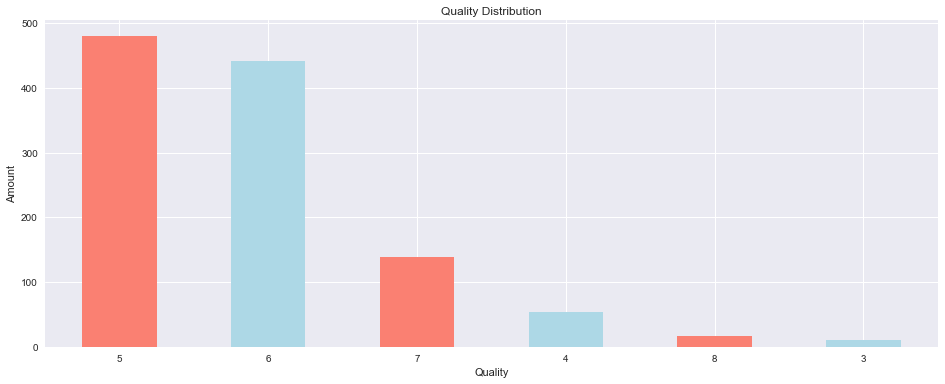

In [11]:
#Having a look at the visualization.
Quality.plot(kind = 'bar',figsize = (16,6),color = ('salmon','lightblue'))
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.xticks(rotation= True);

In [12]:
#Reshaping the quality column.
df['quality'] = df['quality'].replace([3,4,5,6,7,8], [0,1,2,3,4,5])

#Having a look at the target column now.
Quality = df['quality'].value_counts()
Quality

2    480
3    442
4    138
1     53
5     16
0     10
Name: quality, dtype: int64

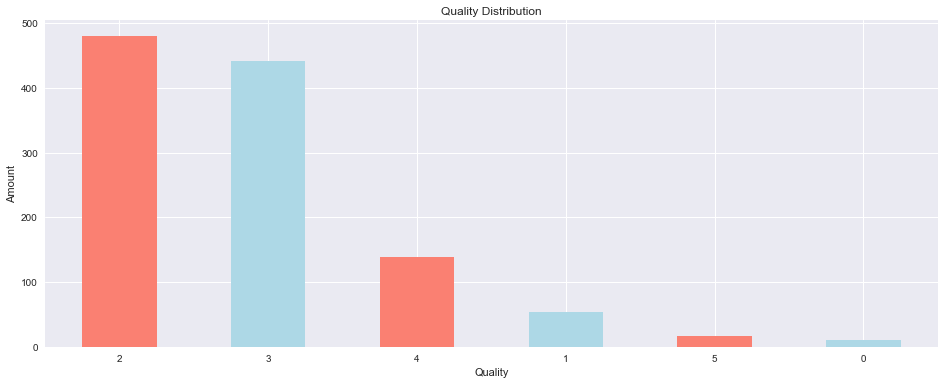

In [13]:
#Having a look at the visualization.
Quality.plot(kind = 'bar',figsize = (16,6),color = ('salmon','lightblue'))
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.xticks(rotation= True);

* It shows like we have imblance distribution of target column.

In [14]:
#Importing required library to balance our dataset.
from imblearn.over_sampling import SMOTE

#Intializing SMOTE
ROS= SMOTE()
ROS

SMOTE()

In [15]:
#Having a look at the dataset now.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2


In [16]:
#let's split dataset first.
x = df.drop('quality',axis = 1)
y = df['quality']

In [17]:
#Doing the resampling of our dependent and independent variables.
x_res,y_res = ROS.fit_resample(x,y)

In [18]:
#Having a look at the shape after resampling.
x_res.shape,y_res.shape

((2880, 11), (2880,))

* So as we can see, now we have equal amount of x and y. That means our dataset is now balanced.

In [19]:
#Assign new name as df1.
df = x_res

#Let's concat the x and y.
df["quality"] = y_res

#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2


In [20]:
#Having a look at the target column now.
Quality = df['quality'].value_counts()
Quality

2    480
3    480
4    480
1    480
5    480
0    480
Name: quality, dtype: int64

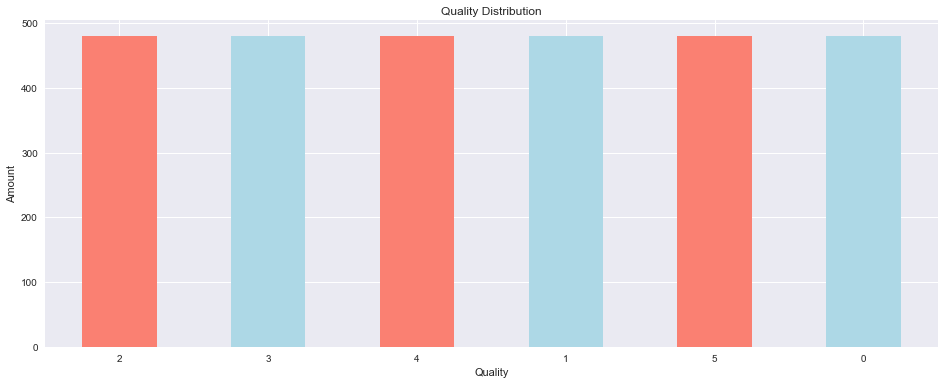

In [21]:
#Having a look at the visualization.
Quality.plot(kind = 'bar',figsize = (16,6),color = ('salmon','lightblue'))
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.xticks(rotation= True);

* As we can see, now we have balance distribution in target column.


In [22]:
#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2


In [23]:
#Having a look at the relation between Quality and fixed acidity.
quality_fixed_acidity_relation = pd.crosstab(df['quality'],df['fixed acidity'])
quality_fixed_acidity_relation

fixed acidity,4.600000,4.622769,4.634051,4.700000,4.900000,5.000000,5.032496,5.100000,5.113475,5.138336,...,14.000000,14.064039,14.300000,14.483188,14.556690,14.921765,15.007428,15.566006,15.600000,15.900000
quality,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,1,0,3,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,4,1,0,...,0,1,0,1,1,1,1,1,1,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


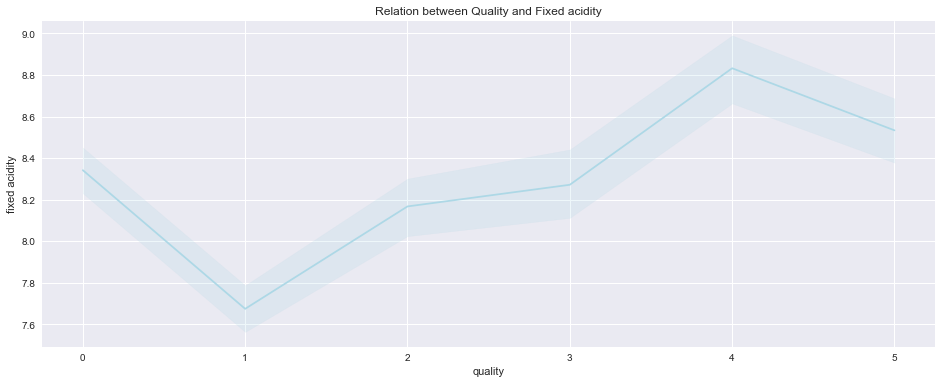

In [24]:
#Having a look at the visualization of Quality with Fixed acidity .
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['fixed acidity'],color = ('lightblue'))
plt.title('Relation between Quality and Fixed acidity');

* So from this graph we can say that the fixed acidity will vary for different quality of wines.

In [25]:
#Having a look at the dataset.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2


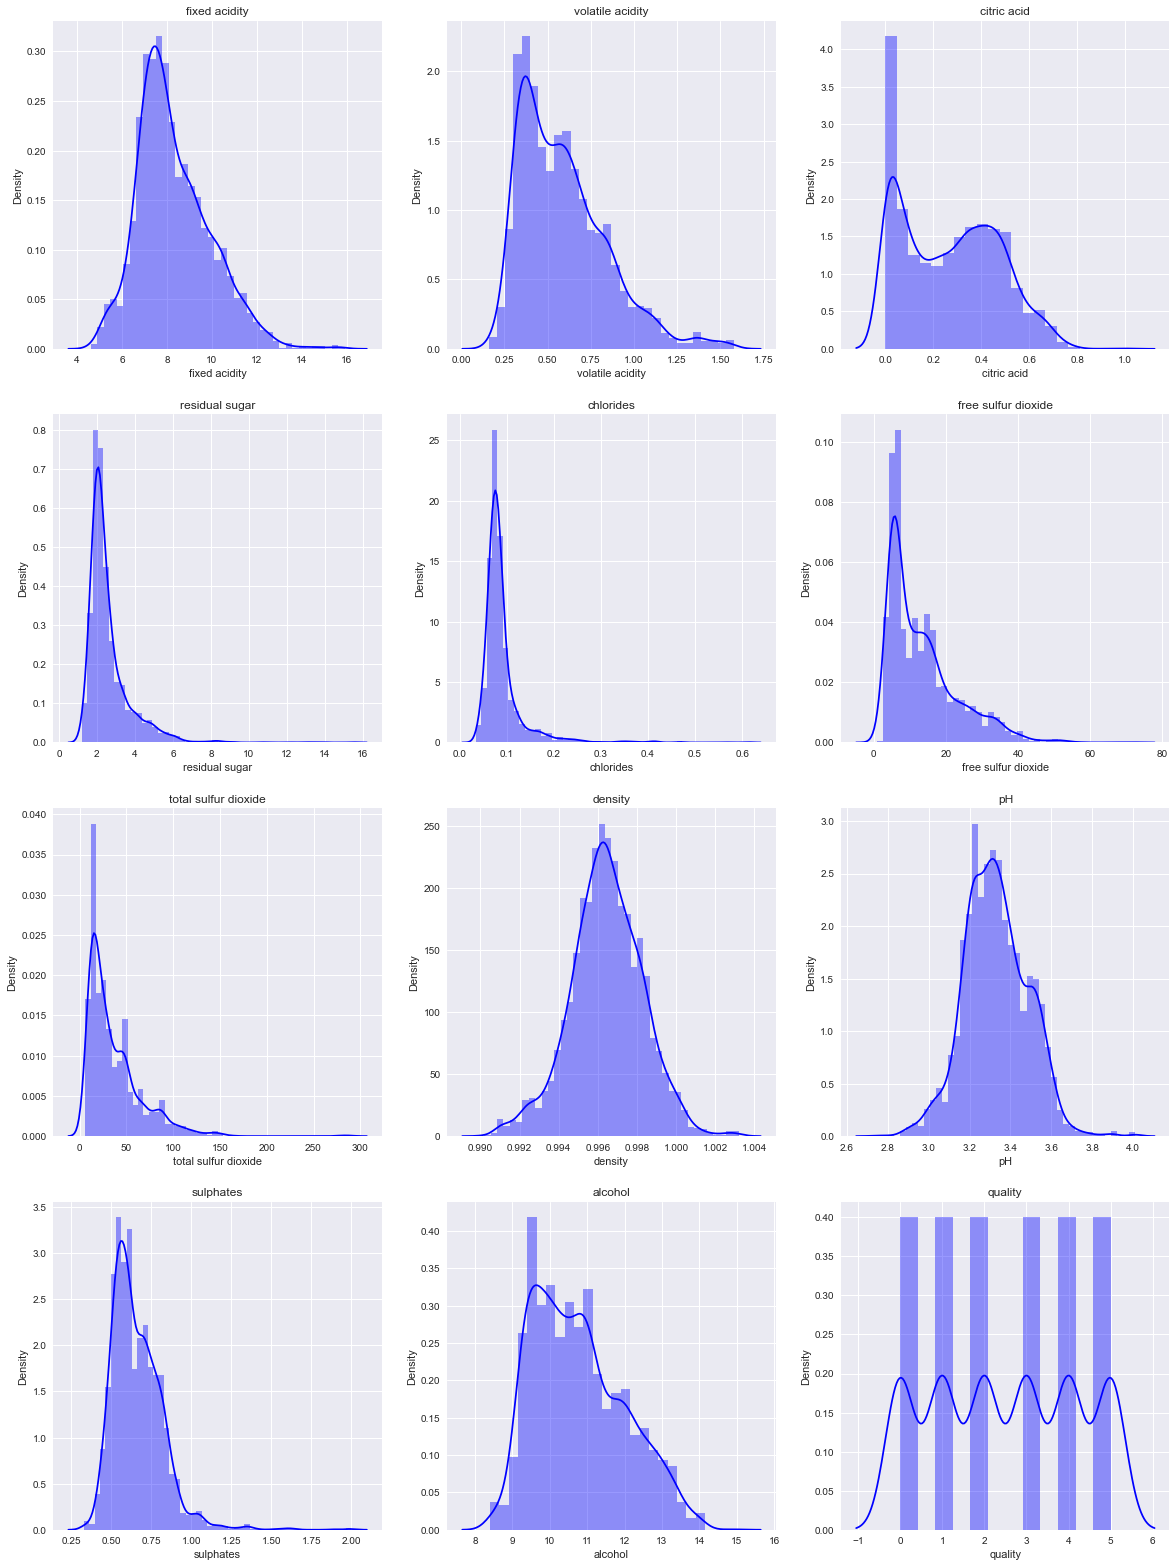

In [26]:
#Having a look at how our data is distributed.
plt.figure(figsize=(20,35))
for i in range(len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[df.columns[i]],color='b')
    plt.title(df.columns[i])

* As we can see, we have the skwness in our dataset. let's try to reduce it.

In [27]:
#Using the log transformation to reduce the skwness of our data.
df[['fixed acidity', 'volatile acidity','residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide','sulphates']] = np.log(df[['fixed acidity', 'volatile acidity','residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide','sulphates']])

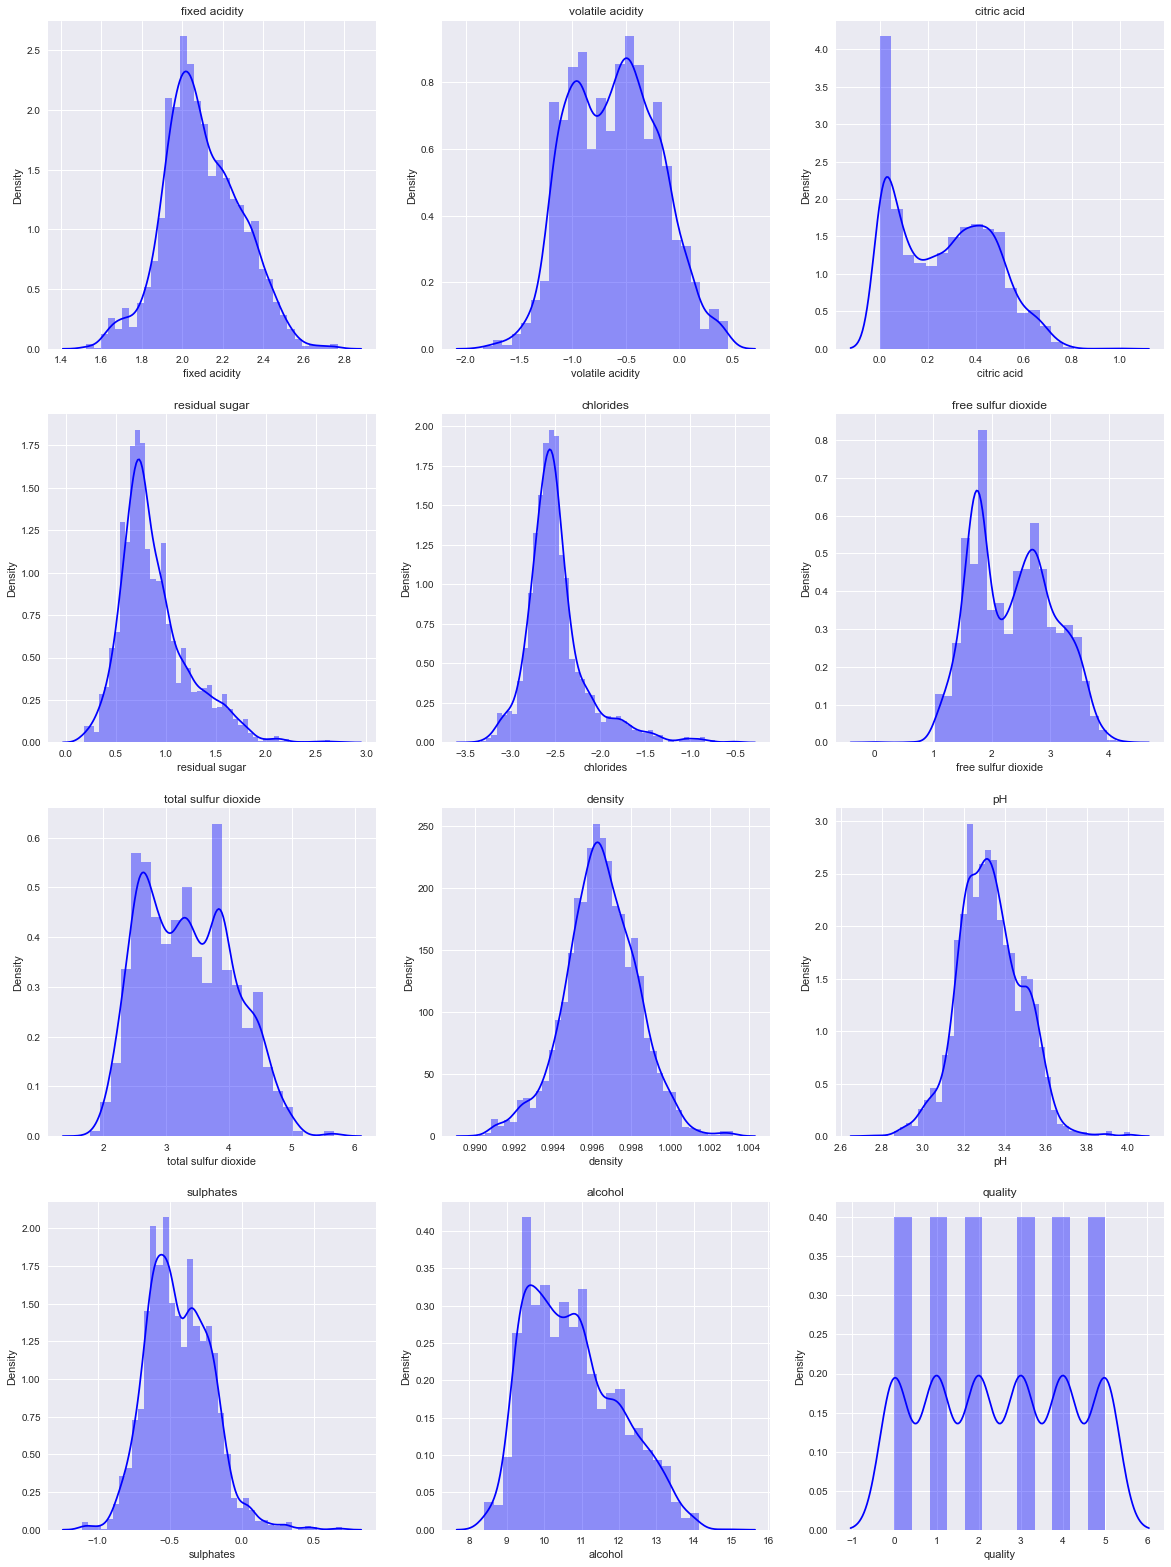

In [28]:
#Having a look at how our data is distributed now.
plt.figure(figsize=(20,35))
for i in range(len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[df.columns[i]],color='b')
    plt.title(df.columns[i])

In [29]:
#Having a look at the missing values.
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

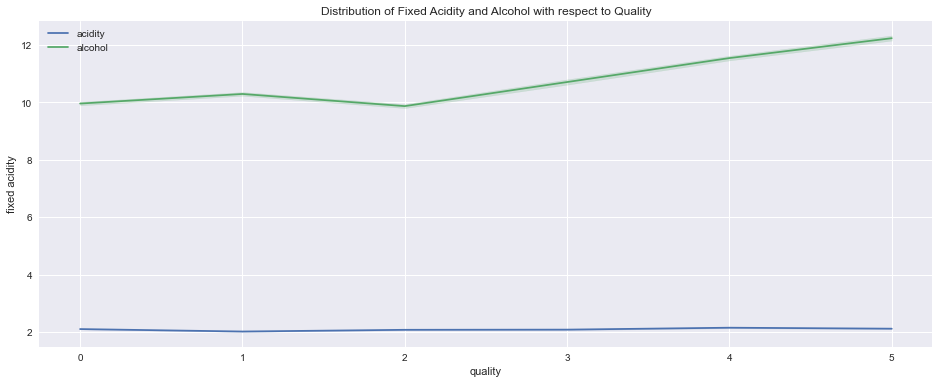

In [30]:
#Having a look at how our data is distributed.
plt.figure(figsize=(16,6))
sns.lineplot(x=df['quality'],y=df['fixed acidity'],label='acidity')
sns.lineplot(x=df['quality'],y=df['alcohol'],label='alcohol')
plt.title('Distribution of Fixed Acidity and Alcohol with respect to Quality')
plt.legend();

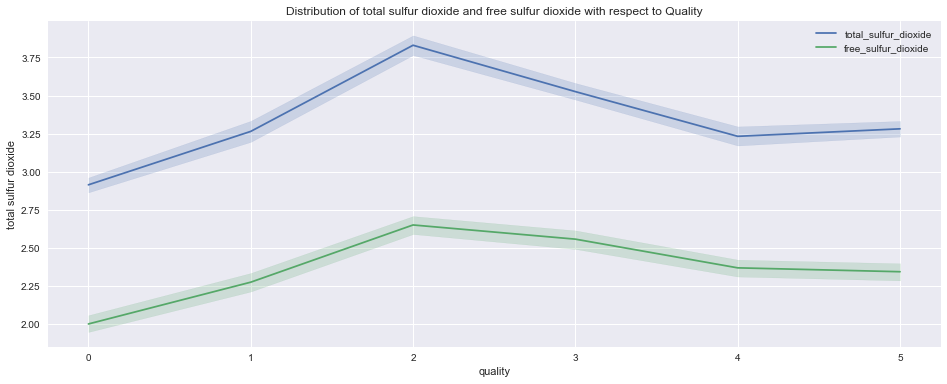

In [31]:
#Having a look at how our data is distributed.
plt.figure(figsize=(16,6))
sns.lineplot(x=df['quality'],y=df['total sulfur dioxide'] ,label='total_sulfur_dioxide')
sns.lineplot(x=df['quality'],y=df['free sulfur dioxide'] ,label='free_sulfur_dioxide')
plt.title('Distribution of total sulfur dioxide and free sulfur dioxide with respect to Quality')
plt.legend();

In [32]:
#Having a look at the relation between Quality and volatile acidity.
quality_fixed_acidity_relation = pd.crosstab(df['quality'],df['volatile acidity'])
quality_fixed_acidity_relation

volatile acidity,-1.832581,-1.714798,-1.660731,-1.609438,-1.560648,-1.547328,-1.522128,-1.514128,-1.495667,-1.469676,...,0.426891,0.430311,0.432291,0.433517,0.433966,0.434537,0.435701,0.449407,0.455896,0.457425
quality,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,1,2,0,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


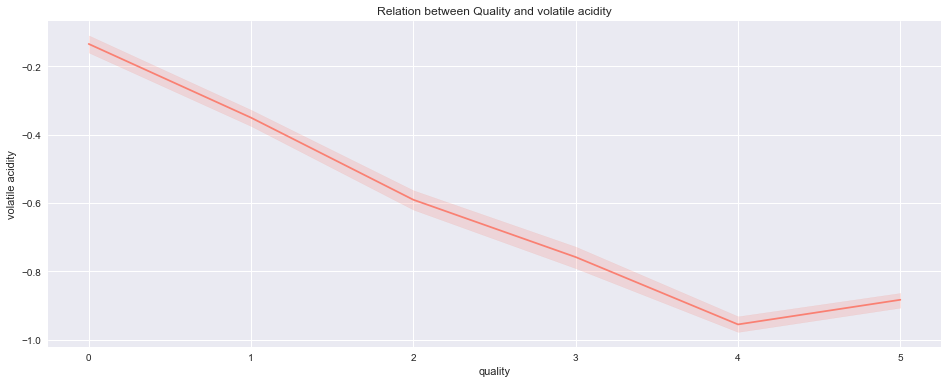

In [33]:
#Having a look at the visualization of Quality and volatile acidity.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['volatile acidity'],color = ('salmon'))
plt.title('Relation between Quality and volatile acidity');

* So from this graph we can state that:
    1. Higher Quality of wine has lower amount of volatile acidity.
    2. Lower Quality of wine has higher amount of volatile acidity.
    
    
* Based on this we cas say that as quality increases volatile acidity decreases.

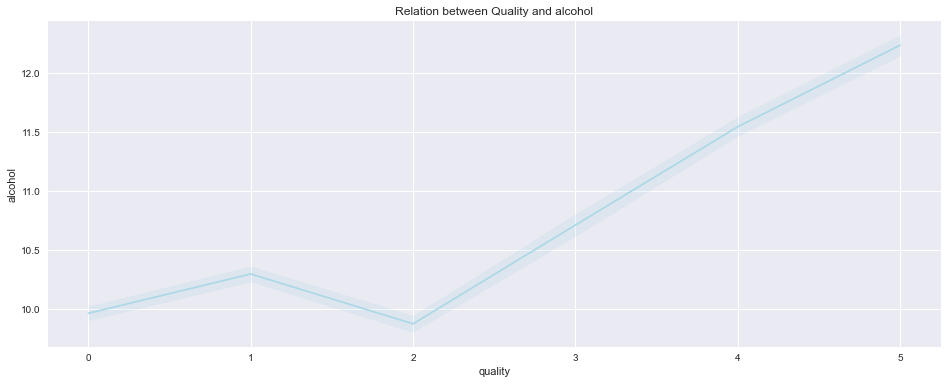

In [34]:
#Having a look at the visualization of Quality and alcohol.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['alcohol'],color = ('lightblue'))
plt.title('Relation between Quality and alcohol');

* So from this graph we can state that:
        1) Higher Quality of wine has the Higher amount of alcohol involve.
        2) Lower quality of wine has Lower amount of alcohol involve.
        
* Based on this we cas say that as Quality increases alcohol quantity also increases.        

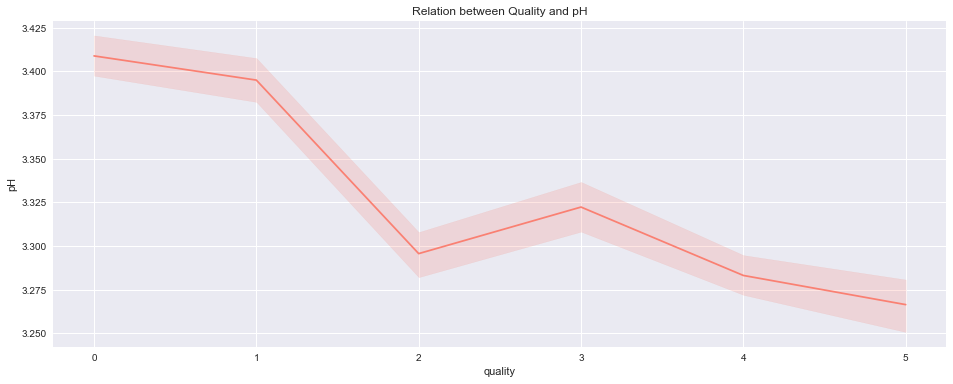

In [35]:
#Having a look at the visualization of Quality and pH.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['pH'],color = ('salmon'))
plt.title('Relation between Quality and pH');

* So from this graph we can state that:
        1) Higher Quality of wine has the Lower PH Value.
        2) Lower quality of wine has Higher PH Value.
        
* Based on this we cas say that as Quality increases PH value decreases.  

In [36]:
#Having a look at the data now.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,2
1,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,2
2,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,3
3,2.001480,-0.415515,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4,2
4,2.066863,-0.510826,0.06,0.470004,-2.673649,2.708050,4.077537,0.9964,3.30,-0.776529,9.4,2


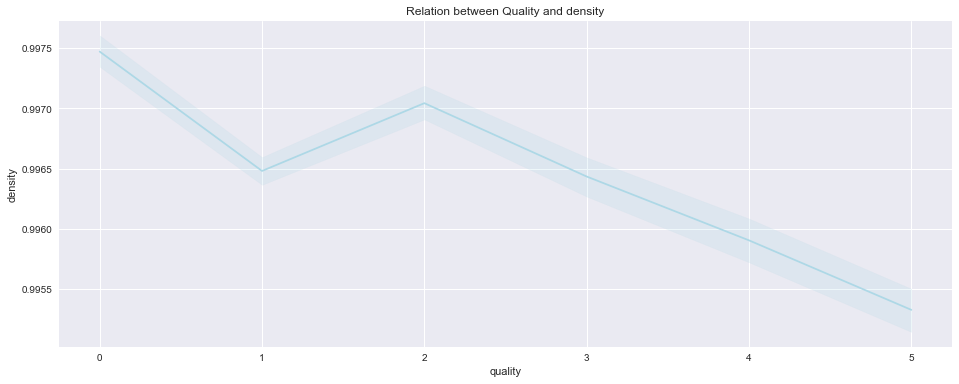

In [37]:
#Having a look at the visualization of Quality and density.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['density'],color = ('lightblue'))
plt.title('Relation between Quality and density');

* So from this graph we can state that:
        1) Higher Quality of wine has the Lower Density Value.
        2) Lower quality of wine has Density PH Value.
        
* Based on this we cas say that as Quality increases Density value will decreases.  

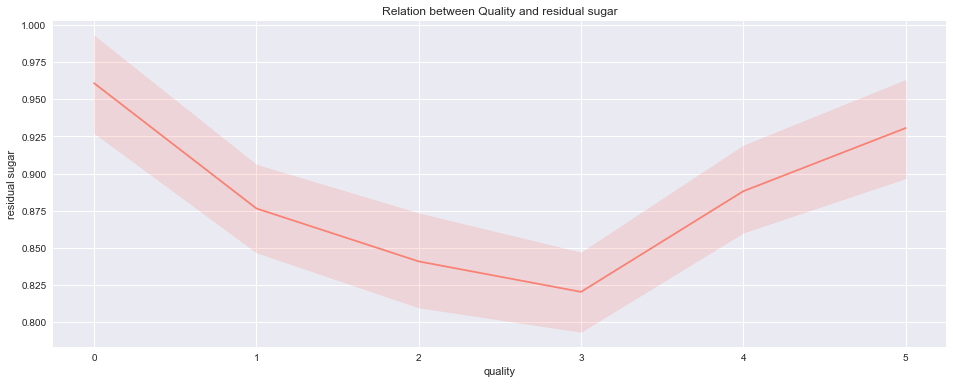

In [38]:
#Having a look at the visualization of Quality and residual sugar.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['residual sugar'],color = ('salmon'))
plt.title('Relation between Quality and residual sugar');

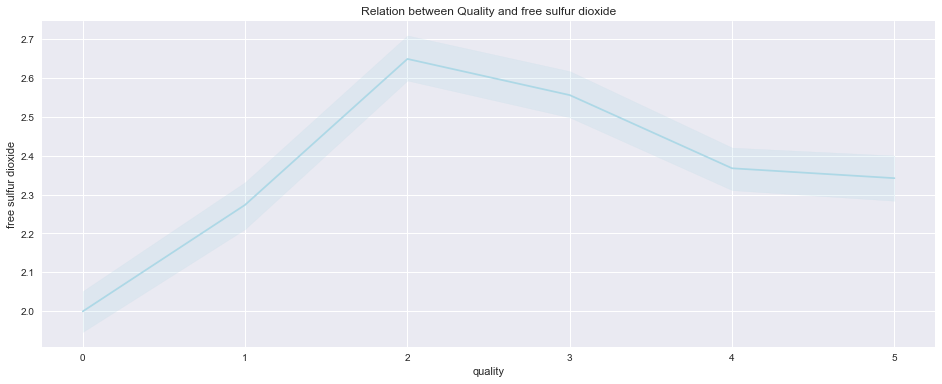

In [39]:
#Having a look at the visualization of Quality and free sulfur dioxide.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['free sulfur dioxide'],color = ('lightblue'))
plt.title('Relation between Quality and free sulfur dioxide');

Text(0.5, 1.0, 'Relation between Quality and sulphates')

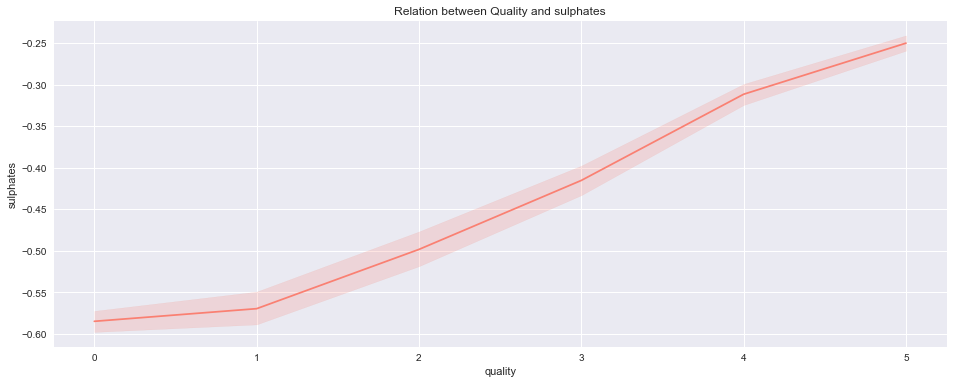

In [40]:
#Having a look at the visualization of Quality and sulphates.
plt.figure(figsize = (16,6))
sns.lineplot(x = df['quality'],y = df['sulphates'],color = ('salmon'))
plt.title('Relation between Quality and sulphates')

* So from this graph we can state that:
        1) Higher Quality of wine has the Higher amount of sulphates inside the wine.
        2) Lower quality of wine has Lower amount of sulphates inside the wine.
        
* Based on this we cas say that as Quality increases amount of sulphates inside the wine increases.  

# Data Preprocessing

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,2
1,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,2
2,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,3
3,2.001480,-0.415515,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4,2
4,2.066863,-0.510826,0.06,0.470004,-2.673649,2.708050,4.077537,0.9964,3.30,-0.776529,9.4,2


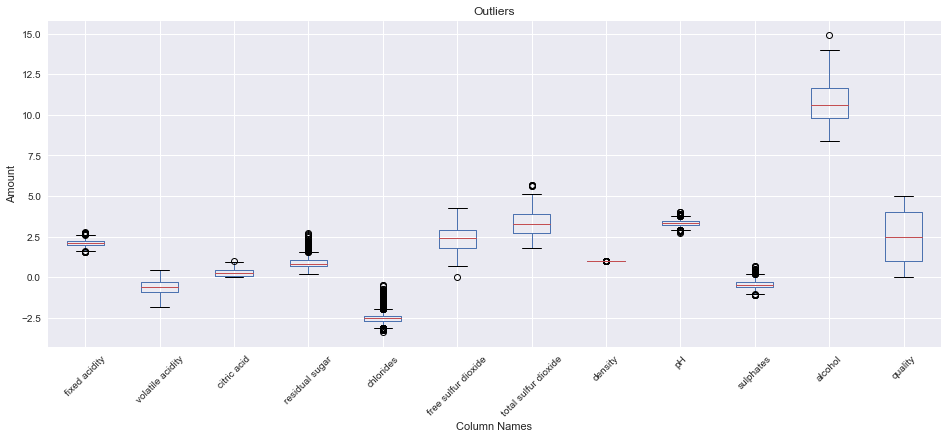

In [42]:
#Having a look at the outliers.
df.boxplot(figsize = (16,6))
plt.title('Outliers')
plt.xlabel('Column Names')
plt.ylabel('Amount')
plt.xticks(rotation = 45);

* It shows we have outliers in our dataset.

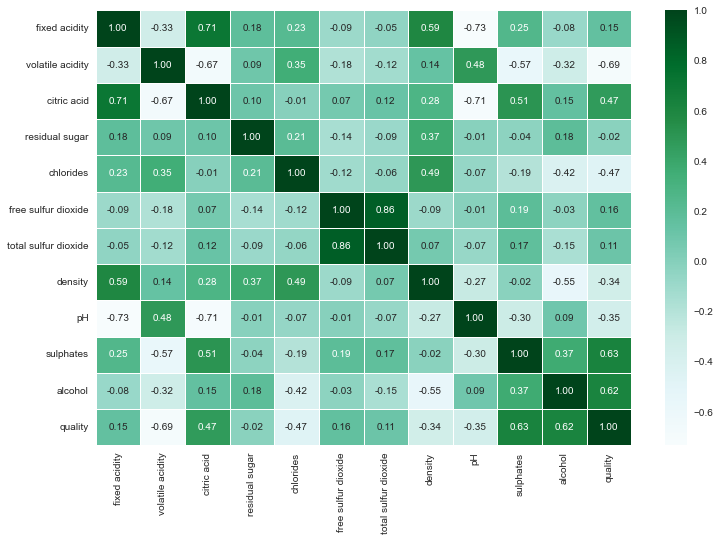

In [43]:
#Having a look at the relation using correlation matrix.
plt.figure(figsize = (12,8))
sns.heatmap(df.corr('spearman'),
            annot= True,
            linewidths= '0.5',
            fmt = '0.2f',
            cmap = 'BuGn');

* Here we can see:

    1) Higher the positive values shows the higher the positive correlation.
    
    2) Higher the negative values shows the higher the negative correlation. 
    
    3) Values near zero shows no relation.

In [44]:
#Having a look at the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,2
1,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,2
2,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,3
3,2.001480,-0.415515,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4,2
4,2.066863,-0.510826,0.06,0.470004,-2.673649,2.708050,4.077537,0.9964,3.30,-0.776529,9.4,2


In [45]:
#Let's remove the values which shows no relation with target col.
df.drop(['residual sugar'],axis = 1,inplace = True)

In [46]:
#Having a look at the dataset now.
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.054124,-0.127833,0.00,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,2
1,2.054124,-0.274437,0.04,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,2
2,2.415914,-1.272966,0.56,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,3
3,2.001480,-0.415515,0.00,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4,2
4,2.066863,-0.510826,0.06,-2.673649,2.708050,4.077537,0.9964,3.30,-0.776529,9.4,2


* As we can see, residual sugar column is removed from our dataset.

# Model Selection

In [47]:
#Importing Required libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,plot_roc_curve

In [48]:
#let's split dependent and independent variable.
x = df.drop('quality',axis = 1)
y = df['quality']

In [49]:
#Split the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state= 43)

In [50]:
#Having a look at the shape of train and test.
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (2304, 10)
x_test :  (576, 10)
y_train :  (2304,)
y_test :  (576,)


# Model Evaluation

In [51]:
#Selecting Models.
models = {"logistic Regression" : LogisticRegression(solver = "liblinear"),
          "Random Forest" : RandomForestClassifier(n_estimators = 100),
          "Adaboost" : AdaBoostClassifier(n_estimators = 100),
          "GradientBoost": GradientBoostingClassifier(n_estimators = 100),
          "XGBoost": XGBClassifier(n_estimators = 100),
          "KNN" : KNeighborsClassifier(),
          "SVM" : SVC(kernel='linear',C = 10)}

models

{'logistic Regression': LogisticRegression(solver='liblinear'),
 'Random Forest': RandomForestClassifier(),
 'Adaboost': AdaBoostClassifier(n_estimators=100),
 'GradientBoost': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'KNN': KNeighbors

In [52]:
#Here fit the train and test data inside model and finding score.
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores_train = {}
    
    model_scores_test = {}
    
    for name, model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores_train[name] = model.score(x_train,y_train)
        
        model_scores_test[name] = model.score(x_test,y_test)
        
        
    return model_scores_test      

In [53]:
#Having a look at which model is performing well for given dataset.
fit_and_score = fit_and_score(models = models,
              x_train = x_train,
              x_test = x_test,
              y_train = y_train,
              y_test = y_test)

fit_and_score

{'logistic Regression': 0.5815972222222222,
 'Random Forest': 0.8628472222222222,
 'Adaboost': 0.3177083333333333,
 'GradientBoost': 0.7916666666666666,
 'XGBoost': 0.8350694444444444,
 'KNN': 0.7743055555555556,
 'SVM': 0.6423611111111112}

* As we can see SVM is performing well as compare to all other model which are getting over fit.

In [54]:
#fiting model score inside dataframe.
fit_and_score = pd.DataFrame(fit_and_score, index = ["Accuracy"])

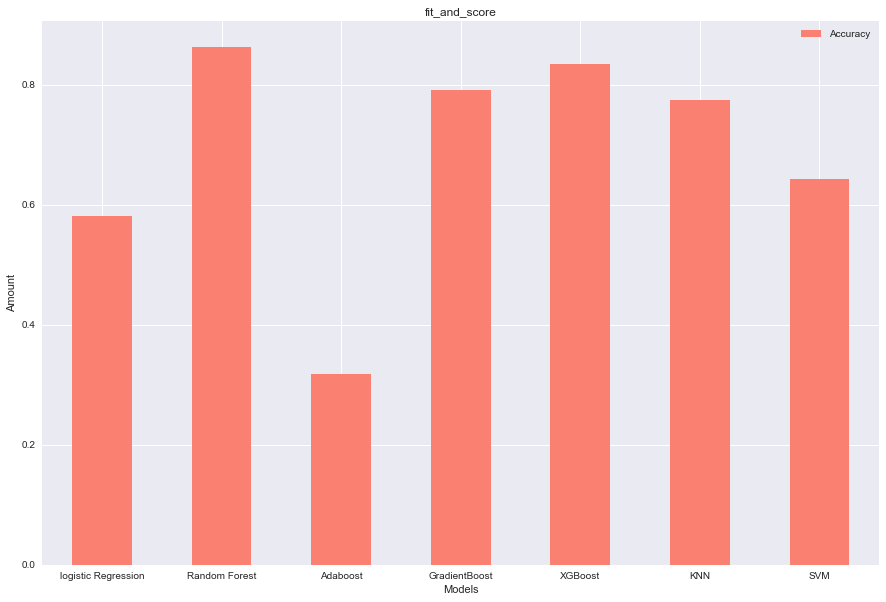

In [55]:
#Visualizing model score.
fit_and_score.T.plot(kind = "bar", figsize = (15,10), color = ["salmon"])
plt.title("fit_and_score")
plt.xlabel("Models")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

## Hyperparameter Tuning using RandomizedSearchCV

we're going to tune:

* Randomforestclassifier()
* logisticRegression()
* SVC()

... using RandomizedSearchCV

In [56]:
#Creating Hyperparameter Grid for logistic Regression.
log_reg = {"C" : np.logspace(-4,4,20),
           "solver" : ["liblinear"]}

#Creating Hyperparameter Grid for Random Forest.
ran_forest = {"n_estimators" : np.arange(1,1000,50),
           "max_depth"    : [None,3,5,20],
           "min_samples_leaf" : np.arange(2,20,2),
           "min_samples_split" : np.arange(1,20,2)}

#Creating Hyperparameter for SVM.
param_grid = {'C': [0.1, 1, 10, 50], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']}

# C: Penalty level or fail result.

In [57]:
#Here we are doing Hyperparameter Tuning with the help of RandomizedSearchCV.
ran_cv_svc = RandomizedSearchCV(SVC(),
                                param_distributions = param_grid,
                                cv = 5,
                                n_iter = 100,
                                verbose = True)

In [58]:
#fiting train data inside tuned model.
ran_cv_svc.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 1, 10, 50],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear']},
                   verbose=True)

In [59]:
#Having look at score of tuned model.
ran_cv_svc.score(x_train,y_train)

0.6163194444444444

In [60]:
#Having look at score of tuned model.
ran_cv_svc.score(x_test,y_test)

0.6423611111111112

In [61]:
#Here we are doing Hyperparameter Tuning with the help of GridSearchCV.
ran_cv_svc = GridSearchCV(SVC(),
                          param_grid = param_grid,
                          cv = 5,
                          verbose = True)

* RandomizedSearchCV also lead to over fitting.

In [62]:
#fiting train data inside tuned model.
ran_cv_svc.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=True)

In [63]:
#Having look at score of tuned model.
ran_cv_svc.score(x_train,y_train)

0.6163194444444444

In [64]:
#Having look at score of tuned model.
ran_cv_svc.score(x_test,y_test)

0.6423611111111112

# Model Prediction

In [65]:
#Initailizing SVC.
svc = SVC(kernel='linear',C = 10)

#fit the train data.
svc.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [66]:
#Having a look at the score for train data.
svc.score(x_train,y_train)

0.6163194444444444

In [67]:
#Having a look at the score for test data.
svc.score(x_test,y_test)

0.6423611111111112

* So will go with svc as it is performing well without any overfittin or underfitting.

In [68]:
#Making prediction with the help of tuned model and x test data.
y_pred = svc.predict(x_test)
y_pred

array([1, 1, 4, 5, 0, 1, 5, 1, 5, 2, 0, 1, 0, 4, 4, 0, 0, 2, 5, 3, 2, 0,
       5, 2, 0, 3, 3, 2, 4, 1, 4, 0, 4, 3, 1, 1, 5, 2, 0, 3, 5, 0, 0, 0,
       3, 0, 0, 0, 0, 1, 3, 4, 5, 4, 5, 5, 1, 5, 3, 0, 4, 3, 4, 0, 4, 2,
       2, 5, 0, 5, 5, 0, 2, 2, 1, 4, 2, 3, 3, 5, 2, 4, 5, 0, 5, 4, 4, 0,
       2, 5, 0, 0, 0, 5, 0, 0, 4, 2, 5, 5, 3, 4, 5, 4, 4, 4, 1, 5, 0, 5,
       0, 0, 2, 2, 3, 2, 1, 4, 5, 2, 1, 0, 4, 2, 4, 5, 1, 5, 3, 4, 0, 2,
       3, 2, 3, 0, 1, 1, 4, 1, 0, 4, 2, 5, 3, 1, 5, 5, 4, 3, 0, 2, 0, 5,
       4, 5, 3, 2, 5, 4, 0, 5, 2, 1, 1, 3, 2, 1, 2, 5, 1, 4, 1, 5, 5, 5,
       0, 0, 4, 4, 4, 3, 4, 0, 4, 0, 4, 4, 1, 4, 2, 2, 1, 0, 4, 1, 3, 0,
       2, 1, 3, 4, 2, 2, 5, 4, 1, 3, 0, 2, 1, 5, 0, 5, 5, 5, 5, 2, 0, 0,
       5, 5, 5, 1, 2, 5, 2, 5, 2, 5, 1, 2, 5, 0, 0, 2, 3, 0, 0, 4, 4, 4,
       1, 5, 0, 2, 5, 0, 2, 5, 2, 3, 4, 3, 1, 4, 1, 4, 1, 0, 5, 0, 2, 5,
       1, 0, 1, 2, 3, 0, 5, 5, 4, 3, 1, 3, 0, 5, 4, 4, 2, 4, 5, 2, 2, 0,
       4, 2, 2, 2, 0, 5, 1, 1, 0, 4, 1, 5, 5, 0, 2,

In [69]:
#Having look at confusion metrix.
print(confusion_matrix(y_test,y_pred))

[[85 16  2  0  0  0]
 [14 60 20  8  0  0]
 [ 8 12 58  9  6  0]
 [ 3  2 23 22 20  8]
 [ 1  2  1 17 61 20]
 [ 0  0  0  0 14 84]]


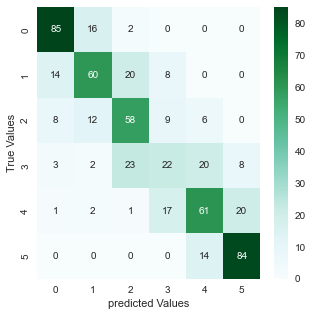

In [70]:
#visualizing the confusion metrix.
def plot_cof_met(y_test,y_pred):
    
    fig,ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cmap = "BuGn")
    
    plt.xlabel("predicted Values")
    plt.ylabel("True Values")
    
    
plot_cof_met(y_test,y_pred) 

In [71]:
#Having look at classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79       103
           1       0.65      0.59      0.62       102
           2       0.56      0.62      0.59        93
           3       0.39      0.28      0.33        78
           4       0.60      0.60      0.60       102
           5       0.75      0.86      0.80        98

    accuracy                           0.64       576
   macro avg       0.62      0.63      0.62       576
weighted avg       0.63      0.64      0.63       576



* As we see our model is giving us 64% of accuracy.

In [72]:
#Here we are finding the best parameter from gd_log_reg model.
ran_cv_svc.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [73]:
clf = SVC(kernel='linear',C = 50,gamma = 1)

clf.fit(x_train,y_train)

SVC(C=50, gamma=1, kernel='linear')

In [74]:
#Having a look at coefficient.
print(clf.coef_)

[[ 9.35964015e+00  4.25223627e+00 -5.42109208e-01  2.65143232e+00
   1.43566814e-01 -1.14452811e+00  3.88923896e+00  1.13837083e+01
   1.42506671e+00 -1.81856229e+00]
 [ 5.14362015e+00  7.02644525e+00  5.76752560e+00  1.66673215e+00
   1.75997085e+00 -3.25622608e+00  1.36337015e+00  8.26599245e+00
   3.73800381e-01 -1.00202053e+00]
 [ 9.90825897e+00  1.08867617e+01  3.61943050e+00  3.53445701e+00
   1.31653425e+00 -2.04580180e+00  1.15520811e+00  1.74197635e+01
  -1.84984032e+00 -2.63646738e+00]
 [ 6.47928145e+00  1.02395742e+01  8.40762776e+00  2.11083153e+00
   7.58166159e-01 -5.78902396e-01  2.78373337e-01  1.53666092e+01
  -3.15813831e+00 -3.38212015e+00]
 [-9.39716572e-02  1.40635711e+00 -5.02193188e-01  8.22013941e-01
   3.57691081e-01 -1.37164238e-01  5.10192721e-03  7.19109294e-01
  -3.73092386e-01 -7.44725192e-01]
 [ 1.37985827e+00  1.94440341e+00  1.27859510e+00  6.37296290e-01
   3.40393365e-01 -9.87173119e-01 -2.16258172e+00  3.78678183e+00
  -1.27450086e+00  2.84620847e-01

In [75]:
#Having look at which column contributed more in the prediction.
con_byu = dict(zip(x_train.columns,list(clf.coef_[0])))
con_byu

{'fixed acidity': 9.359640148000835,
 'volatile acidity': 4.252236266720956,
 'citric acid': -0.5421092077557432,
 'chlorides': 2.651432317248691,
 'free sulfur dioxide': 0.14356681388926518,
 'total sulfur dioxide': -1.1445281085943861,
 'density': 3.8892389628808814,
 'pH': 11.383708332563401,
 'sulphates': 1.4250667056294333,
 'alcohol': -1.818562285247026}

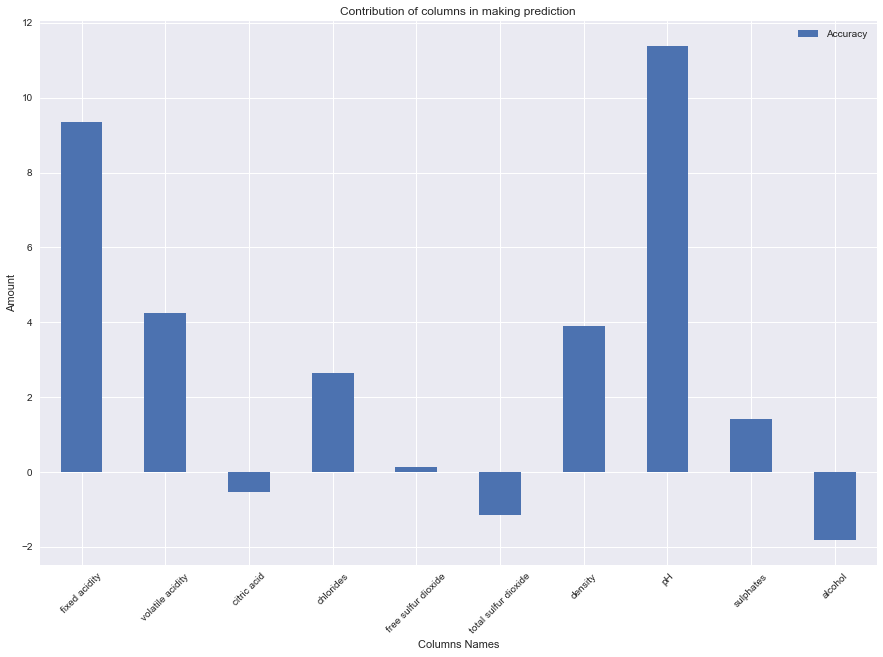

In [76]:
#Visualization.
con_byu = pd.DataFrame(con_byu , index = ["Accuracy"])
con_byu.T.plot(kind = "bar" , figsize = (15,10))
plt.title("Contribution of columns in making prediction")
plt.xlabel("Columns Names")
plt.ylabel("Amount")
plt.xticks(rotation = 45);

* Here Features Importance show which feature contributing how much in prediction.